In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [164]:
netflix_all = pd.read_csv('netflixdata/netflix_titles.csv')
netflix_all.count()


show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [165]:
# Group into shows / movies

netflix_shows = netflix_all[netflix_all['type'] == 'TV Show']
netflix_movies = netflix_all[netflix_all['type'] == 'Movie']

netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


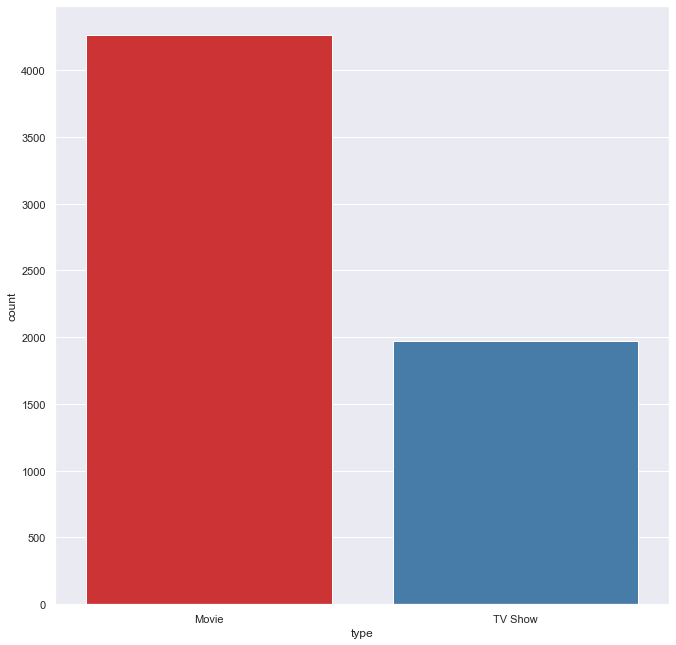

In [166]:
# Visualize number of TVS vs Shows

sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_all, palette="Set1")


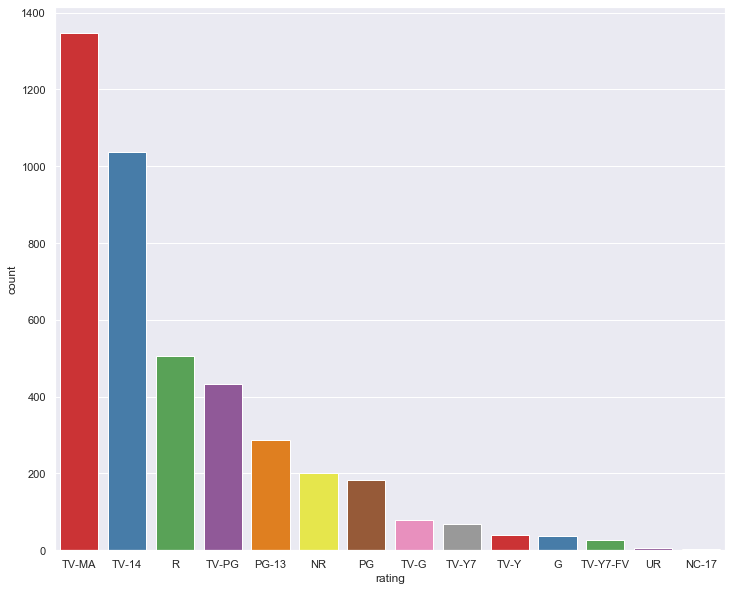

In [167]:
# Analysis of ratings of movies based on audience type

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set1", 
                   order=netflix_movies['rating'].value_counts().index[0:15])

In [168]:
# Check for month when the least amount of content is added.
# Useful for producers who want to decide when to premier their own projects

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

df

year,2008,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,
December,0.0,0.0,0.0,1.0,7.0,44.0,43.0,75.0,53.0,0.0
November,0.0,0.0,0.0,3.0,2.0,18.0,33.0,48.0,87.0,0.0
October,0.0,1.0,2.0,0.0,5.0,19.0,39.0,55.0,84.0,0.0
September,0.0,0.0,1.0,0.0,1.0,19.0,36.0,49.0,66.0,0.0
August,0.0,1.0,1.0,0.0,0.0,19.0,41.0,42.0,71.0,0.0
July,0.0,1.0,0.0,0.0,3.0,12.0,35.0,32.0,78.0,0.0
June,0.0,0.0,0.0,0.0,3.0,8.0,30.0,31.0,61.0,0.0
May,0.0,0.0,0.0,0.0,2.0,5.0,26.0,32.0,68.0,0.0
April,0.0,0.0,1.0,1.0,6.0,8.0,31.0,34.0,58.0,0.0


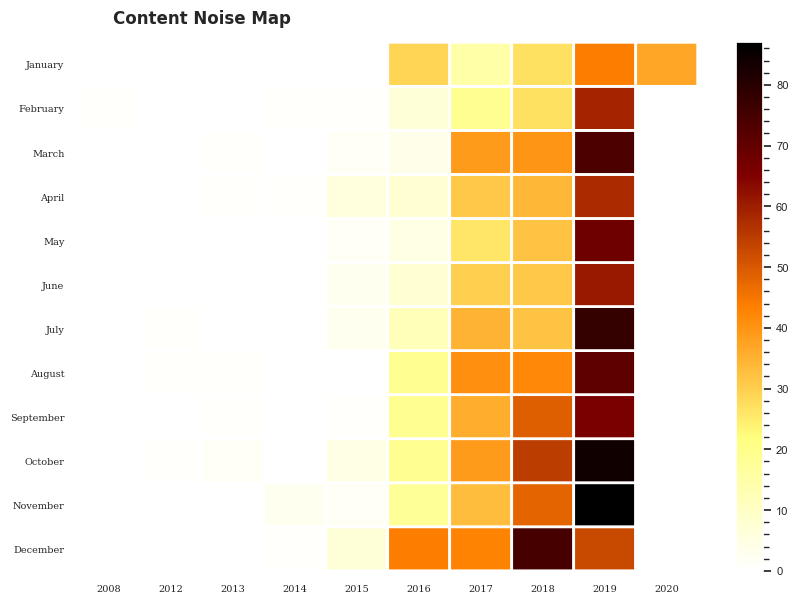

In [169]:
# Visualising the above dataframe into a heatmap

plt.figure(figsize=(10, 7), dpi=100)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Content Noise Map', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [170]:
## Above shows that blocks with lighter colors have relatively less noise i.e. releases per month. 

In [171]:
# Checking IMDB ratings of movies

ratings_from_imdb=pd.read_csv('imdb/IMDb ratings.csv',
                         usecols=['weighted_average_vote'])
titles_from_imdb=pd.read_csv('imdb/IMDb movies.csv', 
                        usecols=['title','year','genre'])

imdb_ratings = pd.DataFrame({'Title':titles_from_imdb.title,
                    'Release Year':titles_from_imdb.year,
                    'Rating': ratings_from_imdb.weighted_average_vote,
                    'Genre':titles_from_imdb.genre})
imdb_ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
imdb_ratings.head()

,Title,Release Year,Rating,Genre
0,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
1,Den sorte drøm,1911,5.9,Drama
2,Cleopatra,1912,5.2,"Drama, History"
3,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,5.7,"Biography, Drama"


In [172]:
# Merge data that has ratings on imdb that is also available on netflix

imdb_ratings.dropna()
joint_data=imdb_ratings.merge(netflix_all,left_on='Title',right_on='title',how='inner')
#Sorted by top rated content
joint_data=joint_data.sort_values(by='Rating', ascending=False)
joint_data.head()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
761,Safe,2019,9.5,"Action, Crime, Thriller",80201500,TV Show,Safe,NaN,"Michael C. Hall, Amanda Abbington, Marc Warren...",United Kingdom,"February 5, 2019",2018,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...","After his teenage daughter goes missing, a wid..."
1529,Oththa Seruppu Size 7,2019,9.1,Drama,81206389,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,"November 4, 2019",2019,TV-MA,103 min,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri..."
1411,Innocent,2017,9.0,Comedy,81026192,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
726,Pulp Fiction,1994,8.9,"Crime, Drama",880640,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
981,The Lord of the Rings: The Return of the King,2003,8.9,"Adventure, Drama, Fantasy",60004484,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...


In [173]:
# Visualizing top content created 

top_content = joint_data[0:10]
fig =px.sunburst(
    top_content,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

In [174]:
# Visualizing bottom content created 

bottom_content = joint_data[-10:]
fig =px.sunburst(
    bottom_content,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

In [175]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
top_creating_countries = country_count[0:10]
top_creating_countries

,country
United States,1063
India,619
United Kingdom,135
Canada,60
"United Kingdom, United States",47
Spain,44
Turkey,41
France,40
Philippines,40
South Korea,38


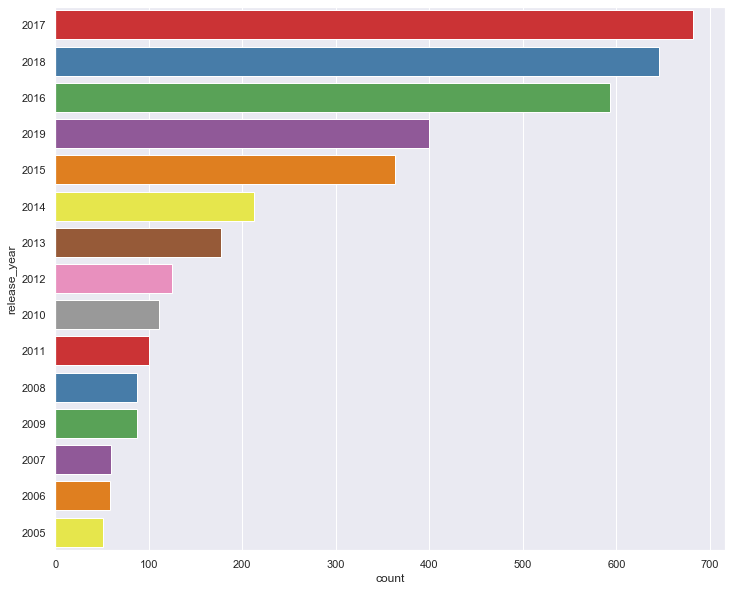

In [176]:
# Analysis based on movie release year

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", 
                   order=netflix_movies['release_year'].value_counts().index[0:15])


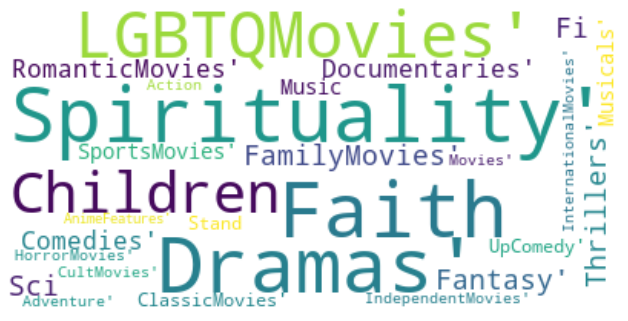

In [177]:
# Exploring Genres with a word cloud
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Look through df and append all genres into array gen
genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# Using gen to make the wordcloud
text = list(set(gen))
plt.rcParams['figure.figsize'] = (11, 11)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [178]:
# Group genres by the number of occurences of each one
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}
g

{'InternationalMovies': 1927,
 'Dramas': 1623,
 'Comedies': 1113,
 'Documentaries': 668,
 'Action&Adventure': 597,
 'IndependentMovies': 552,
 'Thrillers': 392,
 'Children&FamilyMovies': 378,
 'RomanticMovies': 376,
 'Stand-UpComedy': 281,
 'HorrorMovies': 262,
 'Music&Musicals': 243,
 'Sci-Fi&Fantasy': 193,
 'SportsMovies': 157,
 'ClassicMovies': 84,
 'LGBTQMovies': 60,
 'Movies': 56,
 'CultMovies': 55,
 'Faith&Spirituality': 47,
 'AnimeFeatures': 45}

In [179]:
## Repating similar processes above for the TV shows

In [180]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])

for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1
                
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Arrival delay (in minutes)')

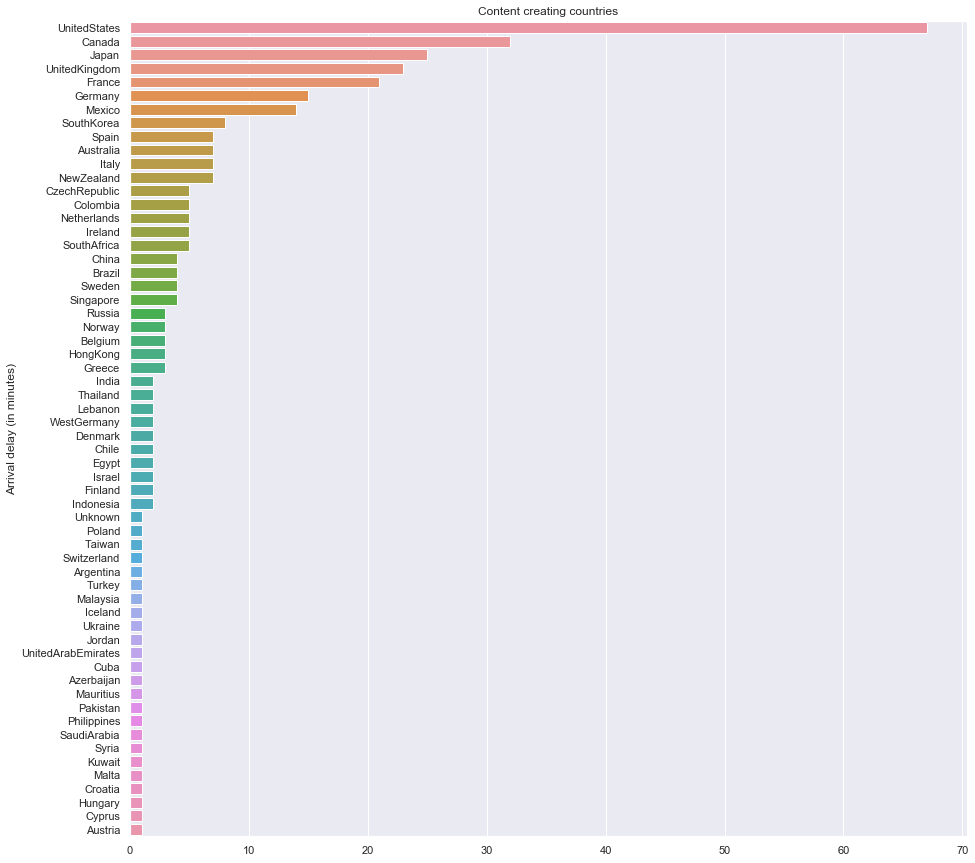

In [181]:
# Ranking countries that are most content producing

plt.figure(figsize=(15,15))

plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

plt.ylabel("Arrival delay (in minutes)")

In [182]:
# Working with seasons of tv shows

features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

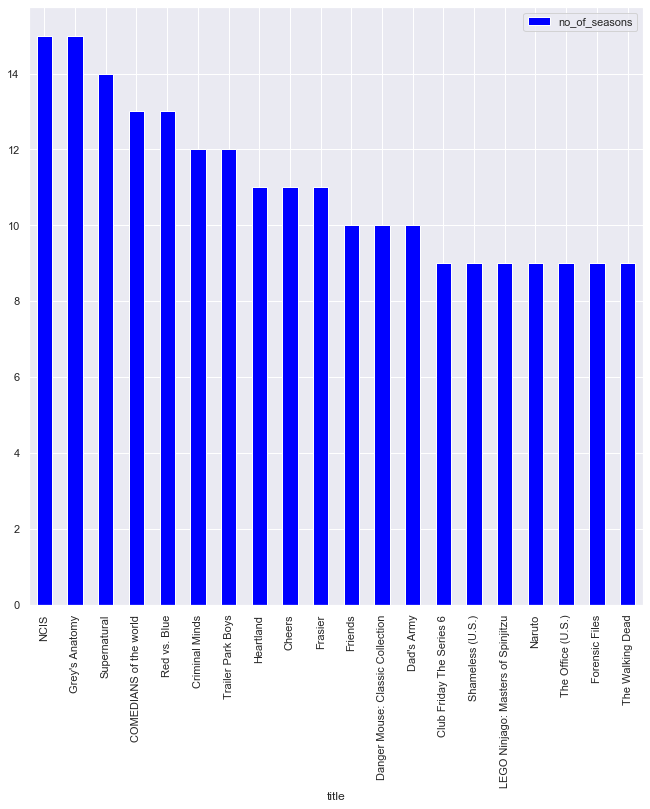

In [183]:
# Tv shows with most seasons

t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

In [184]:
# Same theory, but checking for shows with lowest number of seasons

bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

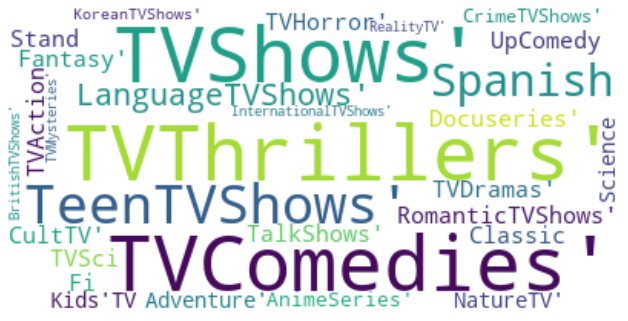

In [185]:
# Workcloud for Genres

genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (11, 11)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [186]:
# Shows with top duration

topdirs=pd.value_counts(netflix_all['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [187]:
## CONTENT BASED RECOMMENDATION

from sklearn.feature_extraction.text import TfidfVectorizer

In [188]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN values
netflix_all['description'] = netflix_all['description'].fillna('')

#Contructing the tf-idf word weighted matrix
tfidf_matrix = tfidf.fit_transform(netflix_all['description'])

tfidf_matrix.shape


(6234, 16151)

In [189]:
netflix_all.to_csv(r'netflix_all.csv', header=True)

In [190]:
# Will use the cosine similarity score 

from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [191]:
indices = pd.Series(netflix_all.index, index=netflix_all['title']).drop_duplicates()

In [192]:
# Function to call recommendations.
# Input: title, cosine similarity

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    
    #Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on similairty score
    sim_scores = sorted(sim_scores, key=lambda x: x[1],reverse=True)
    
    #Top 10 most similar
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    #Send ack top 10 most similar movies
    
    return netflix_all['title'].iloc[movie_indices]

In [193]:
get_recommendations('Breaking Bad')

3901                      Dismissed
3744                    Iron Ladies
6077                  Alexa & Katie
2806                The Five Venoms
5566    Ouran High School Host Club
4110               Taare Zameen Par
3107               Loving Annabelle
2416          Servant of the People
309                    Mr. Woodcock
3551                        Posesif
Name: title, dtype: object

In [194]:
# While this works, this doesn't seem to be right
# Add more content based on which the filtering can occur e.g. title, cast, etc

In [195]:
filledna=netflix_all.fillna('')

In [196]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [197]:
# Features based on which the model filters -> Room for experimentation

features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [198]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)

In [199]:
# Creating a bag of words

def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)


In [200]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [201]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [202]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_all['title'].iloc[movie_indices]

In [203]:
get_recommendations_new('Breaking bad', cosine_sim2)


5850                       Better Call Saul
1967    The Assassination of Gianni Versace
5614                          The Blacklist
6137                                  Ozark
4084           The Lizzie Borden Chronicles
5873                    Designated Survivor
3817                               Unsolved
5930                              Kakegurui
6114                                 Wanted
1459                             Get Shorty
Name: title, dtype: object

In [204]:
# Not too shabby